In [508]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sm
from scipy import stats

import statsmodels as sm
from statsmodels.stats.weightstats import ttest_ind

from sklearn.model_selection import train_test_split,KFold,cross_validate
from sklearn.linear_model import LinearRegression


# Data Cleaning

In [509]:
# importing the csv dataset and printing out the first ten rows 
df = pd.read_csv('kc_house_data.csv')
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [510]:
# printing out all information for the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [511]:
# data over 1 year
df['date']= pd.to_datetime(df['date']) 
print(df['date'].min())
print(df['date'].max())

2014-05-02 00:00:00
2015-05-27 00:00:00


In [512]:
# checking for missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [513]:
# there are some missing values for waterfront
df['waterfront'].unique()
# filling missing values with 0
df['waterfront'] = df['waterfront'].fillna(0)
df['waterfront'].unique()


array([0., 1.])

In [514]:
# filling missing values with 0
df['view'].unique()
df['view'] = df['view'].fillna(0)

In [515]:
# filling missing values for renovated houses and putting them as 0 too
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['yr_renovated'] .unique()


array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [516]:
# also the square_basement feature seems to be an object
#  and there are some question marks. Assuming those means unknown we are setting them to 0

df['sqft_basement'].value_counts()
df['sqft_basement'] = df['sqft_basement'].fillna(0)

# changed the type from object to float
df['sqft_basement'] = df['sqft_basement'].replace({'?': 0})
df['sqft_basement'].astype(float)
df['fl_sqft_basement'] = df['sqft_basement'].astype(float)
df.drop('sqft_basement', axis = 1, inplace = True)

In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id                  21597 non-null int64
date                21597 non-null datetime64[ns]
price               21597 non-null float64
bedrooms            21597 non-null int64
bathrooms           21597 non-null float64
sqft_living         21597 non-null int64
sqft_lot            21597 non-null int64
floors              21597 non-null float64
waterfront          21597 non-null float64
view                21597 non-null float64
condition           21597 non-null int64
grade               21597 non-null int64
sqft_above          21597 non-null int64
yr_built            21597 non-null int64
yr_renovated        21597 non-null float64
zipcode             21597 non-null int64
lat                 21597 non-null float64
long                21597 non-null float64
sqft_living15       21597 non-null int64
sqft_lot15          21597 non-null int64
fl_sqft_basement    21597 non-null float64
dty

In [518]:
#There are 177 house that have been sold twice (or more)
id_len = len(df['id'].unique())
x = len(df) - id_len
x

177

In [519]:
# one of them has been sold  three times
df['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [520]:
# showcasing the house sold three times
unique_3_initial = df.loc[df['id'] == 795000620]
unique_3_initial

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,fl_sqft_basement
17588,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,1950,0.0,98168,47.5045,-122.33,1070,6250,0.0
17589,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,1950,0.0,98168,47.5045,-122.33,1070,6250,0.0
17590,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,1950,0.0,98168,47.5045,-122.33,1070,6250,0.0


In [521]:
# created a new Dataframe with unique values and last price for the double houses.
df_unique = df.drop_duplicates(subset = 'id', keep = 'last')

# Showcasing the in the unique dataset and the only house sold three times, the last price has been left
unique_3 = df_unique.loc[df_unique['id'] == 795000620]
unique_3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,fl_sqft_basement
17590,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,1950,0.0,98168,47.5045,-122.33,1070,6250,0.0


In [522]:
# Created a new DataFrame for houses sold twice. One of them (795000620) three times
houses_sold_twice = df[df.duplicated(['id'], keep= 'first')]
len(houses_sold_twice)


177

In [523]:
# double checking how many houses sold twice are present in the initial dataframe
# number is 353 because all IDs are repeated twice with the exception of the house sold 3 times
x = df['id'].isin(houses_sold_twice['id']) == 1
x.value_counts()
len(x)

21597

In [524]:
# updated initial df with a new columns indicating whether the house has been sold more than once

df['sold_twice'] = df['id'].isin(houses_sold_twice['id']) == 1
df.loc[(df['sold_twice']== True),'sold_twice_y'] = 1
df.drop('sold_twice', axis = 1 , inplace = True)
df['sold_twice_y'] = df['sold_twice_y'].fillna(0).astype(int)


In [525]:
# how many zipcodes are there
len(df['zipcode'].unique())

70

In [526]:
# importing cities to replace zipcodes

data_zip = pd.read_html ('http://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033')
final_zip = pd.concat([data_zip[2],data_zip[3],data_zip[4]])

final_zip.drop('County',axis = 1, inplace = True)
final_zip.rename(columns={'Zip Code':'zipcode'}, inplace=True)
# found duplicates in zipcodes
final_zip['zipcode'].value_counts()



98004    5
98148    5
98155    5
98198    4
98168    4
        ..
98224    1
98002    1
98005    1
98006    1
98050    1
Name: zipcode, Length: 108, dtype: int64

In [527]:
# dropping the duplicates of zipcodes as mostly are from Seattle -- 54
final_zip = final_zip.drop_duplicates(subset = 'zipcode', keep = 'last')
len(final_zip)

# merging the unique values of zipcodes with our dataframe
merged = pd.merge(df,final_zip,on='zipcode',how='left')
len(merged)
merged.isna().sum()

id                    0
date                  0
price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
sqft_above            0
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
fl_sqft_basement      0
sold_twice_y          0
City                198
dtype: int64

In [528]:
# singling out the cities left with no City associated and luckily it's only 98077
# 
missing_zip = merged.loc[(merged['City'].isnull())]
missing_zip['zipcode'].value_counts()

98077    198
Name: zipcode, dtype: int64

In [529]:
# Googled zipcode associated with Woodinville and replaced it where missing
missing_zip.loc[missing_zip['City'].isnull(), 'City'] = 'Woodinville'
# doing the same directly on merged
merged.loc[merged['City'].isnull(), 'City'] = 'Woodinville'

In [530]:
# checking we have no missing values for cities
merged.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
fl_sqft_basement    0
sold_twice_y        0
City                0
dtype: int64

In [531]:
# DATA FRAME WITH SOME INITIAL DATA CLEANING PLUS CITIES
merged


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,fl_sqft_basement,sold_twice_y,City
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,0,Tukwila
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,400.0,0,Seattle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0,0,Bothell
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,910.0,0,Seattle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,0,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,0,Seattle
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,0,Seattle
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,0,Seattle
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0,0,Issaquah


# 1. What cities are there the most expensive houses in the State of Washington?

In [532]:
# refining the names 
merged['City'].unique()

array(['Tukwila', 'Seattle', 'Bothell', 'Redmond', 'Federal Way',
       'Maple Valley', 'Bellevue', 'Duvall', 'Auburn', 'Shoreline',
       'Mercer Island', 'Kent', 'Issaquah', 'Renton', 'Vashon',
       'Yarrow Point', 'Kirkland', 'Black Diamond', 'North Bend',
       'Woodinville', 'Snoqualmie', 'Enumclaw', 'Fall City', 'Carnation',
       'Medina'], dtype=object)

In [533]:
# changing some names
merged.loc[((merged['City']=='Lk Forest Park') | (merged['City']== 'Lk Forest Pk')), 'City']='Lake Forest Park'

In [534]:
merged['City'].unique()
# grouping by cities by their average
city_plotting = merged.groupby('City').agg(Av_price=('price','mean'))
city_plotting.reset_index(inplace=True)
city_plotting.sort_values(by='Av_price',ascending= True ,inplace=True)

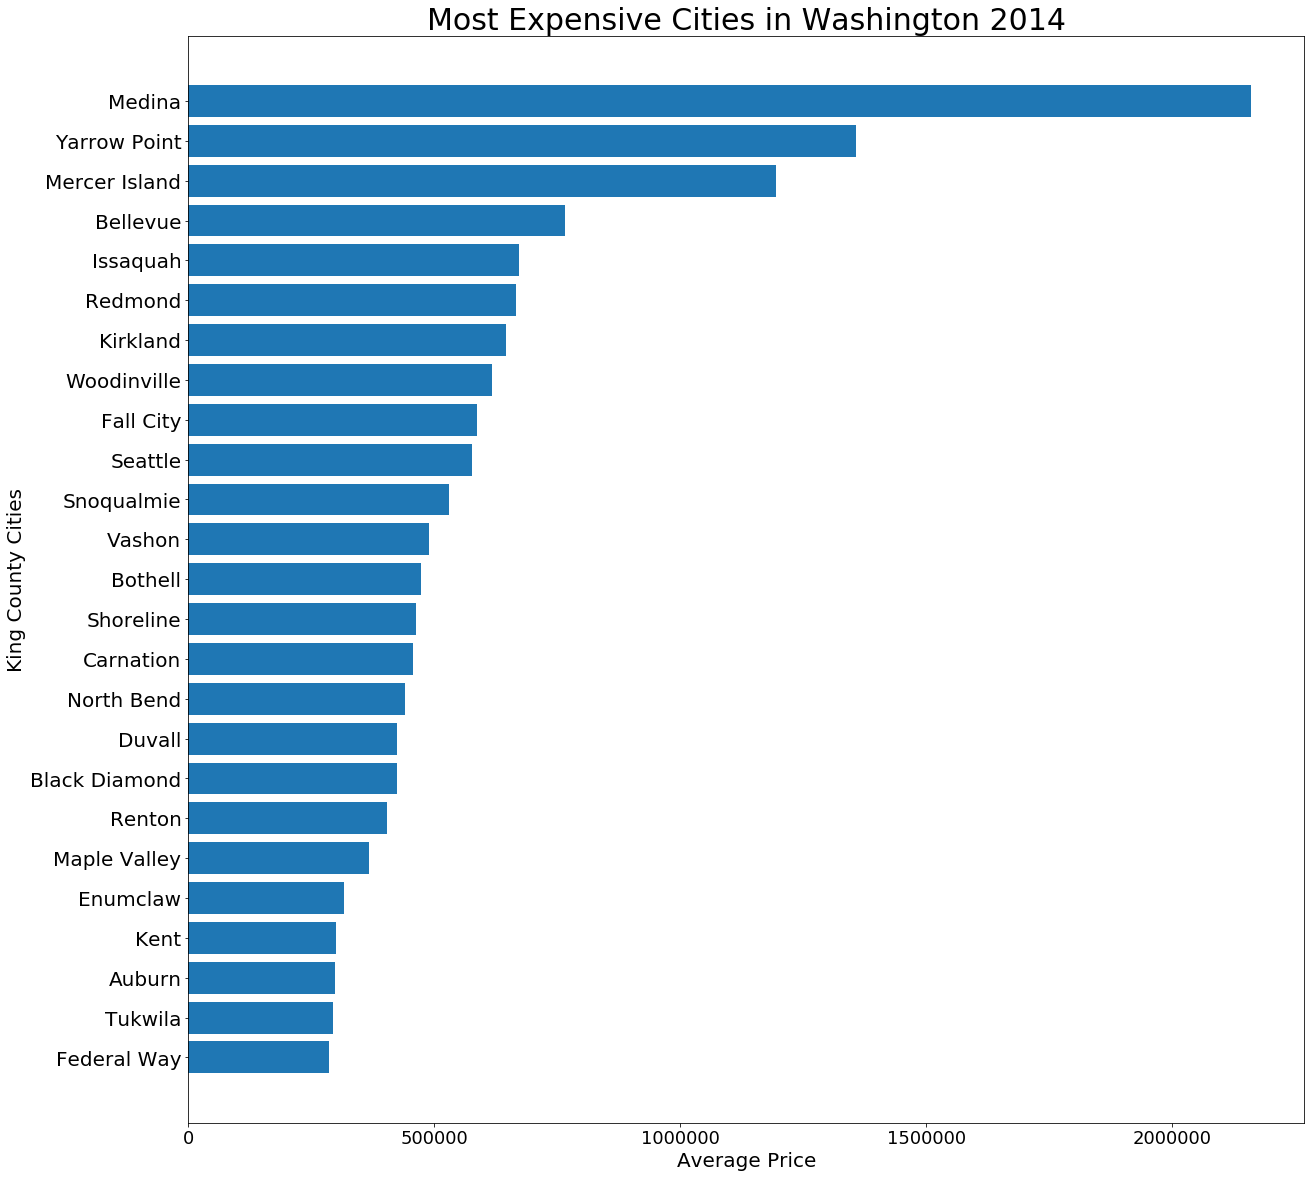

In [535]:

plt.figure(figsize=(20,20))
plt.barh(city_plotting['City'],city_plotting['Av_price'])
plt.title('Most Expensive Cities in Washington 2014', fontsize = 30)
plt.xticks(fontsize=18)
plt.yticks(fontsize = 20)
plt.xlabel('Average Price', fontsize = 20)
plt.ylabel ('King County Cities', fontsize = 20)

plt.show()

# 2. Is there significant evidence that renovating the house increases the price?

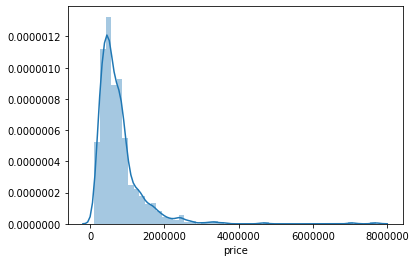

In [536]:
# finding out how many houses were renovated 
df_renovated = df_unique.loc[df['yr_renovated'] > 0]
mean_ren = df_renovated['price'].mean()
std_ren = df_renovated['price'].std()
len(df_renovated)
graph_renovated = sns.distplot(df_renovated['price'])

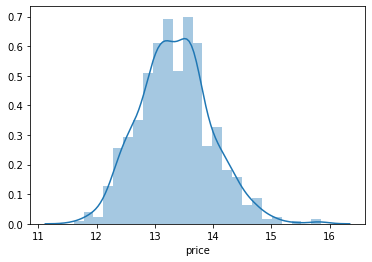

In [537]:
# tranforming renovated house into log
helpful_log_renovated = np.log(df_renovated['price'])
sns.distplot(helpful_log_renovated)
plt.show()

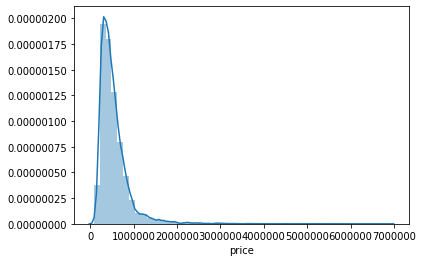

In [538]:
# creating DataFrame for houses that didn't go through renovation
df_non_renovated = df_unique.loc[(df['yr_renovated'] == 0)| (df['yr_renovated'].isnull())]
mean_non_renovated = df_non_renovated['price'].mean()
std_non_renovated = df_non_renovated['price'].std()
len(df_non_renovated)
graph_non_renovated = sns.distplot(df_non_renovated['price'])

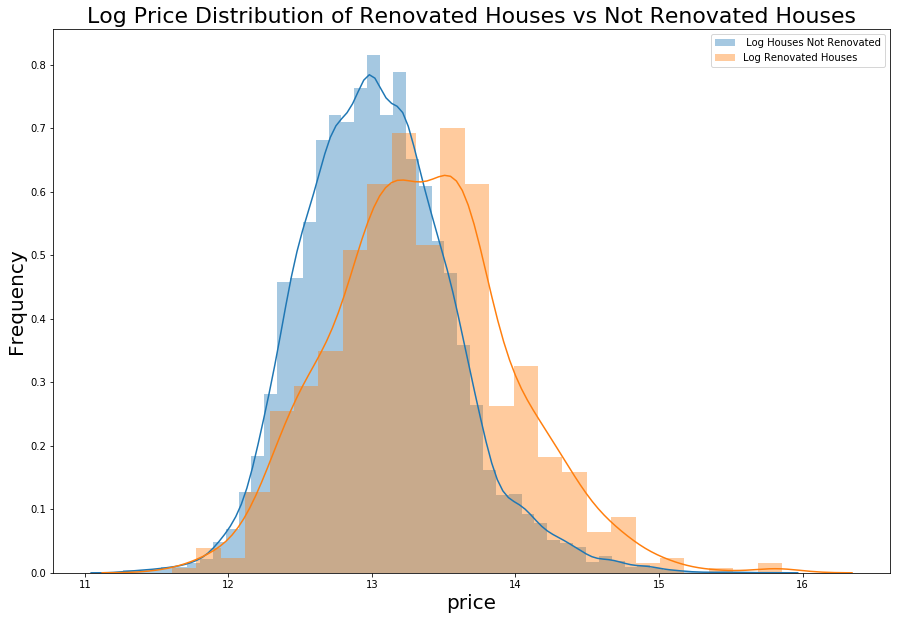

In [539]:
# transforming price into log for not renovated houses
helpful_log_non = np.log(df_non_renovated['price'])


fig,ax = plt.subplots(figsize = (15,10))
plt.title('Log Price Distribution of Renovated Houses vs Not Renovated Houses', fontsize = 22)
ax.set_xlabel('price', fontsize= 20)
ax.set_ylabel('Frequency', fontsize= 20) 

sns.distplot(helpful_log_non, ax=ax, label = ' Log Houses Not Renovated')
sns.distplot(helpful_log_renovated, ax=ax, label = 'Log Renovated Houses')
plt.legend()
plt.show()

In [540]:
# H0 renovation has no effect whatsoever on final price
mu = np.log(df_unique['price']).mean()

one_sample = stats.ttest_1samp(helpful_log_renovated, mu)

print ("The t-statistic is %.3f and the p-value is %.3f." % one_sample)

The t-statistic is 12.998 and the p-value is 0.000.


**There seems to be a significant difference between price of renovated houses and not-renovated houses**

In [ ]:
# hot encoding for renovation
# 0/nan indicates when a house has never been renovated

df_unique['yr_renovated'].value_counts()


In [ ]:
renovated_houses = df_unique.loc[df_unique['yr_renovated']> 0]

df_unique['renovated_y'] = renovated_houses['id'].isin(df_unique['id']) == 1
df_unique


In [ ]:
# # manually hot encoding from true/flase to 0/1
replaced = df_unique['renovated_y'].replace({None: 0})
final = replaced.replace({True:1})
df_unique['renovated_he'] = final
df_unique


# 3. Is there any feature that it's significantly different between houses that have been sold more than once?

# Splitting Train - Test Data

In [265]:
# setting up the predictor
target = df['price']


In [266]:
# Split that data 

df, df_test, target, target_test = train_test_split(df,target, test_size=.2, random_state= 12)
print('This is my train database', df.shape)
print('This dependant variable train', df_test.shape)
print('This is my train dependant variable',  target.shape)
print('This is my test dependant variable', target_test.shape)

This is my train database (17277, 22)
This dependant variable train (4320, 22)
This is my train dependant variable (17277,)
This is my test dependant variable (4320,)


# Exploratory Data Analysis EDA 

In [239]:
# corr matrix showcasing higher positive correlations in warmer colours
df.drop(['id'], axis=1).corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sold_twice_y,fl_sqft_basement
price,1.0,0.31,0.53,0.7,0.089,0.26,0.28,0.4,0.033,0.67,0.61,0.052,0.12,-0.049,0.31,0.025,0.59,0.084,-0.043,0.33
bedrooms,0.31,1.0,0.51,0.56,0.029,0.17,0.0049,0.078,0.021,0.35,0.47,0.16,0.02,-0.16,-0.018,0.14,0.39,0.028,-0.0053,0.28
bathrooms,0.53,0.51,1.0,0.76,0.083,0.51,0.065,0.19,-0.13,0.67,0.69,0.51,0.051,-0.21,0.013,0.23,0.57,0.084,-0.054,0.28
sqft_living,0.7,0.56,0.76,1.0,0.17,0.35,0.11,0.29,-0.071,0.77,0.88,0.32,0.051,-0.21,0.043,0.25,0.76,0.18,-0.049,0.43
sqft_lot,0.089,0.029,0.083,0.17,1.0,-0.016,0.012,0.078,-0.013,0.11,0.18,0.052,0.0035,-0.13,-0.086,0.24,0.15,0.7,-0.0094,0.013
floors,0.26,0.17,0.51,0.35,-0.016,1.0,0.028,0.04,-0.27,0.46,0.52,0.5,0.0048,-0.07,0.045,0.12,0.28,-0.011,-0.053,-0.24
waterfront,0.28,0.0049,0.065,0.11,0.012,0.028,1.0,0.37,0.026,0.088,0.076,-0.026,0.047,0.028,-0.0028,-0.034,0.09,0.03,-0.01,0.093
view,0.4,0.078,0.19,0.29,0.078,0.04,0.37,1.0,0.044,0.26,0.18,-0.051,0.096,0.087,0.019,-0.071,0.29,0.072,-0.018,0.27
condition,0.033,0.021,-0.13,-0.071,-0.013,-0.27,0.026,0.044,1.0,-0.16,-0.17,-0.36,-0.062,0.013,-0.008,-0.11,-0.099,-0.0028,-0.021,0.16
grade,0.67,0.35,0.67,0.77,0.11,0.46,0.088,0.26,-0.16,1.0,0.76,0.45,0.013,-0.19,0.11,0.21,0.72,0.12,-0.067,0.17


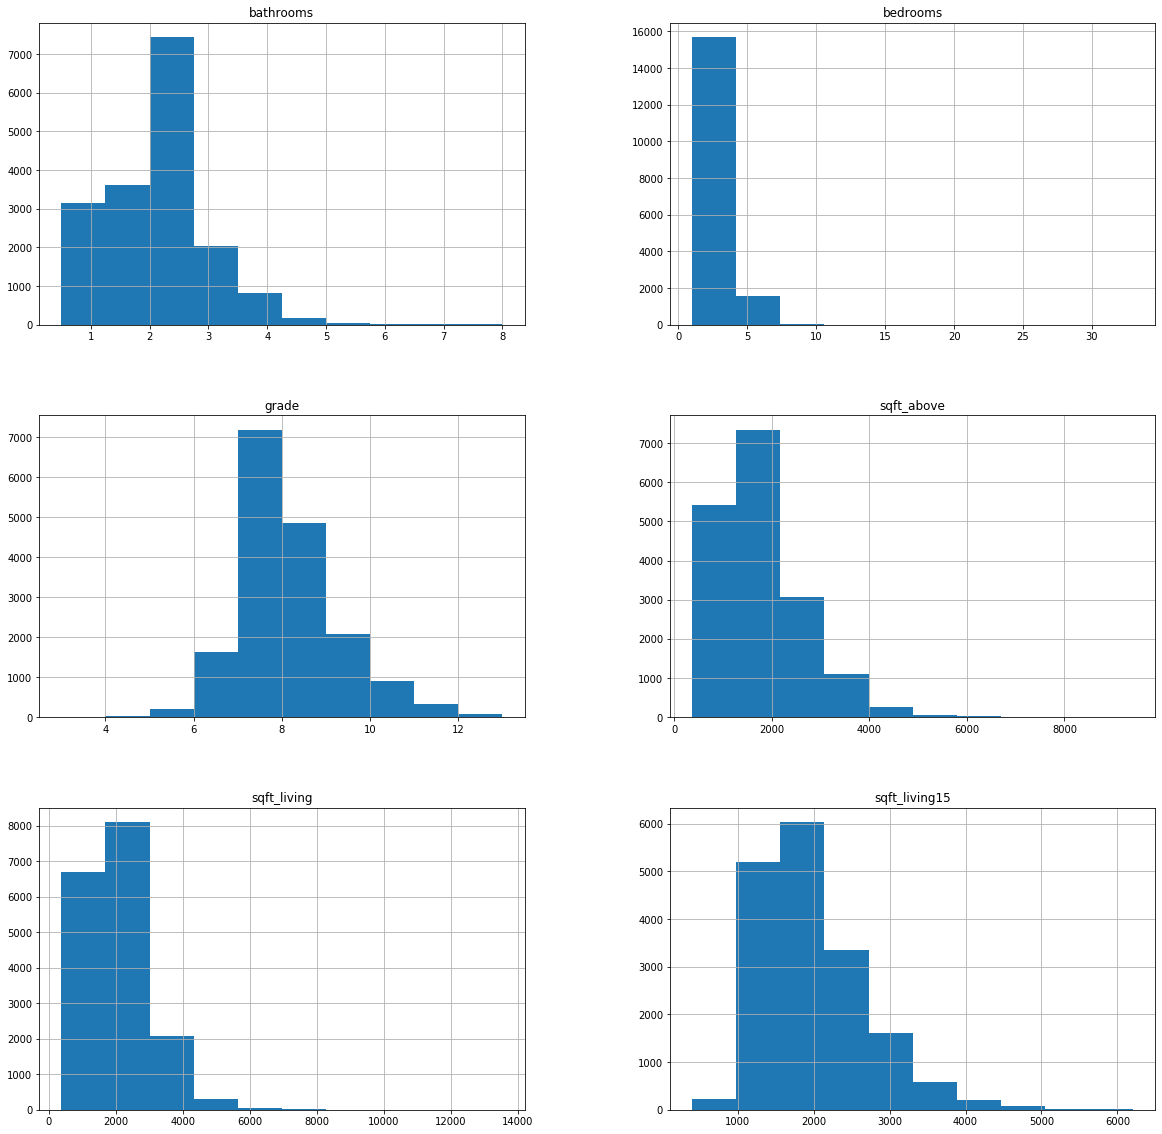

In [203]:
# checking for normality of most interesting data
df[['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above','sqft_living15', ]].hist(figsize = (20,20))
plt.show()

In [168]:
# transforming all of those variables into logs



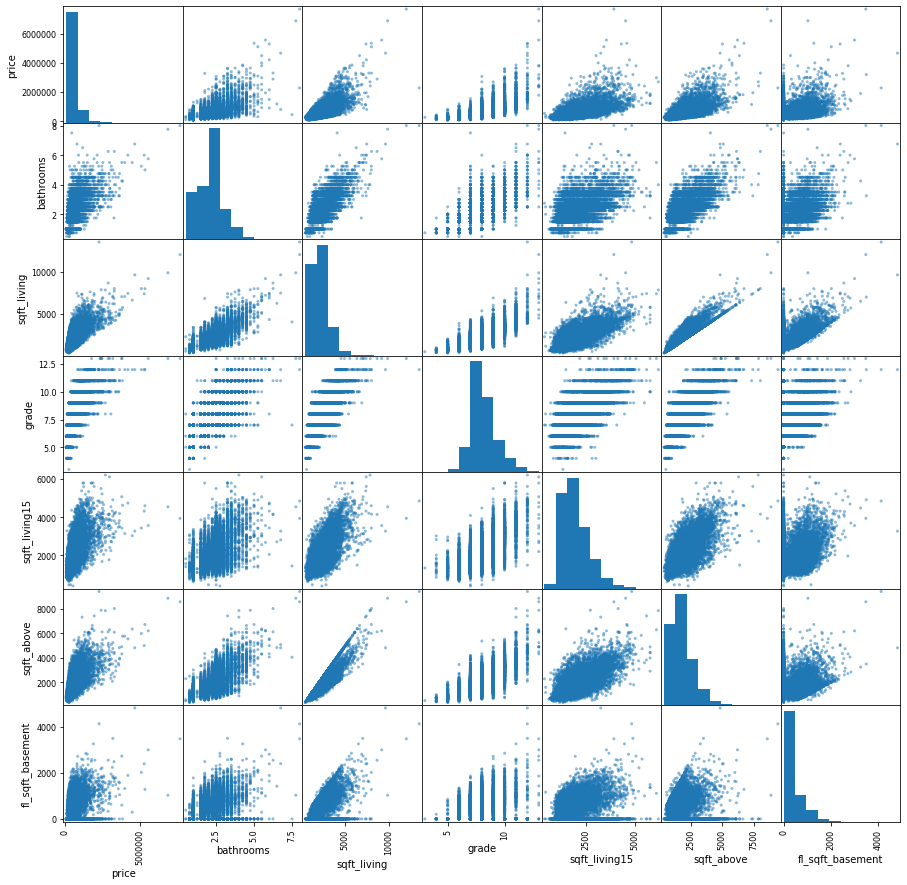

In [241]:
# checking for non-linear relationships
df_scatter = df_unique[['price', 'bathrooms','sqft_living', 'grade', 'sqft_living15', 'sqft_above', 'fl_sqft_basement']]
df_scatter

pd.plotting.scatter_matrix(df_scatter,figsize  = [15, 15]);
plt.show()

In [69]:
# Correlation map with heat map. Warmer colours show a positive correlation

df_unique.drop(['id'], axis=1).corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,logbath,logbedrooms,logsqft_living
price,1.0,0.31,0.53,0.7,0.089,0.25,0.26,0.39,0.034,0.67,0.6,0.051,0.12,-0.051,0.31,0.02,0.58,0.082,0.46,0.3,0.61
bedrooms,0.31,1.0,0.52,0.58,0.032,0.18,-0.0022,0.078,0.026,0.36,0.48,0.16,0.017,-0.16,-0.011,0.13,0.39,0.031,0.51,0.96,0.62
bathrooms,0.53,0.52,1.0,0.76,0.088,0.5,0.064,0.18,-0.13,0.67,0.69,0.51,0.048,-0.2,0.023,0.22,0.57,0.088,0.97,0.53,0.76
sqft_living,0.7,0.58,0.76,1.0,0.17,0.35,0.1,0.28,-0.062,0.76,0.88,0.32,0.051,-0.2,0.051,0.24,0.76,0.18,0.71,0.58,0.95
sqft_lot,0.089,0.032,0.088,0.17,1.0,-0.0056,0.021,0.075,-0.0092,0.11,0.18,0.052,0.005,-0.13,-0.086,0.23,0.14,0.72,0.075,0.033,0.15
floors,0.25,0.18,0.5,0.35,-0.0056,1.0,0.021,0.027,-0.27,0.46,0.52,0.49,0.0031,-0.059,0.049,0.12,0.28,-0.011,0.5,0.19,0.37
waterfront,0.26,-0.0022,0.064,0.1,0.021,0.021,1.0,0.38,0.017,0.083,0.072,-0.025,0.074,0.029,-0.012,-0.038,0.084,0.031,0.047,-0.0085,0.079
view,0.39,0.078,0.18,0.28,0.075,0.027,0.38,1.0,0.045,0.25,0.17,-0.056,0.09,0.087,0.0058,-0.079,0.28,0.073,0.16,0.07,0.24
condition,0.034,0.026,-0.13,-0.062,-0.0092,-0.27,0.017,0.045,1.0,-0.15,-0.16,-0.37,-0.056,0.0044,-0.016,-0.11,-0.095,-0.0034,-0.12,0.026,-0.052
grade,0.67,0.36,0.67,0.76,0.11,0.46,0.083,0.25,-0.15,1.0,0.76,0.45,0.016,-0.18,0.11,0.2,0.71,0.12,0.64,0.38,0.74


# Baseline Model Only with 'Grade'


In [113]:
# setting up train and test data
train=df_unique.sample(frac=0.8,random_state=200)
test=df_unique.drop(train.index) 
print(len(train))
print(len(test))
print(len(df_unique))


17136
4284
21420


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,logbath,logbedrooms,logsqft_living,renovated_y,renovated_he
5353,3395041236,2014-10-23,300000.0,3,2.50,1800,3253,2.0,0.0,0.0,...,98108,47.5401,-122.292,1800,3081,0.916291,1.098612,7.495542,NaN,0
14242,1338300555,2015-03-20,1230000.0,6,2.25,2930,4320,2.0,0.0,0.0,...,98112,47.6295,-122.306,2860,4320,0.810930,1.791759,7.982758,NaN,0
1852,8665900295,2015-04-23,439500.0,3,2.50,1600,6510,1.0,0.0,0.0,...,98155,47.7679,-122.308,1600,10507,0.916291,1.098612,7.377759,NaN,0
11239,625100004,2015-03-17,450000.0,3,2.00,1540,67756,1.0,0.0,0.0,...,98077,47.7210,-122.078,2060,67756,0.693147,1.098612,7.339538,True,1
14775,4167700210,2014-08-26,240000.0,3,1.75,1520,9600,1.0,0.0,0.0,...,98023,47.3263,-122.365,2060,9600,0.559616,1.098612,7.326466,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5055,1425059178,2014-05-07,460000.0,3,2.00,1760,9055,2.0,0.0,0.0,...,98052,47.6534,-122.128,2010,9383,0.693147,1.098612,7.473069,NaN,0
14302,1423900580,2014-06-25,280000.0,3,1.75,1230,8250,1.0,0.0,0.0,...,98058,47.4526,-122.176,1250,8250,0.559616,1.098612,7.114769,NaN,0
20718,255550070,2014-06-26,330675.0,4,3.00,1930,3031,1.0,0.0,0.0,...,98019,47.7457,-121.985,1930,2611,1.098612,1.386294,7.565275,NaN,0
18152,3664500300,2014-11-06,230000.0,2,1.00,1470,25661,1.5,0.0,0.0,...,98059,47.4878,-122.130,1670,43301,0.000000,0.693147,7.293018,NaN,0


In [151]:
# baseline model only with grade
import statsmodels.api as sm

train.drop(['sqft_basement', 'date'], axis = 1, inplace = True)
print(train.columns)
for independent in list(train.columns):
    y = train['price']
    X = train.drop('price', axis = 1)
    X = train[independent]
    # Setting up the LEARNER
    X = sm.add_constant(X)
    model_sm = sm.OLS(y,X)

    # Actually LEARNING
    results = model_sm.fit()

    # Evaluating performance
    r2 = results.rsquared
    r2 = r2.round(2)
    print('R2 = {}'.format(r2))

    # # Understanding the LEARNED model
    est_b = results.params
    print(est_b.round(4))
    


KeyError: "['sqft_basement'] not found in axis"

In [112]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                 1.331e+04
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:28:33   Log-Likelihood:            -2.3900e+05
No. Observations:               17136   AIC:                         4.780e+05
Df Residuals:                   17134   BIC:                         4.780e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.058e+06    1.4e+04    -75.481      0.000   -1.09e+06   -1.03e+06
grade       2.086e+05   1808.312    115.376      0.000    2.05e+05    2.12e+05
==============================================================================
Omnibus:                    16400.365   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1965910.033
Skew:                           4.305   Prob(JB):                         0.00
Kurtosis:                      54.762   Cond. No.                         52.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model with Grade, LogBath, LogBedrooms and Dummy Renovated

In [144]:
# normalising variables  
scaled_bath = (train['logbath']-np.mean(train['logbath']))/np.sqrt(np.var(train['logbath']))
scaled_bedroom = (train['logbedrooms']-np.mean(train['logbedrooms']))/np.sqrt(np.var(train['logbedrooms']))
scaled_grade = (train['grade']-np.mean(train['grade']))/np.sqrt(np.var(train['grade'])) 
dummy = train['renovated_he']

# concatenate all variables into a new dataframe

data_ols = pd.concat([scaled_bath, scaled_bedroom, scaled_grade, dummy], axis=1)


import statsmodels.api as sm

y = train['price']
X = data_ols 
# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results1 = model_sm.fit()

# Evaluating performance
r2 = results1.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))                                                           
X                                                                     

R2 = 0.45
const           532940.4200
logbath           8185.5861
logbedrooms      17560.9630
grade           230747.2201
renovated_he    219174.5906
dtype: float64


,const,logbath,logbedrooms,grade,renovated_he
5353,1.0,0.605482,-0.280146,-0.566930,0
14242,1.0,0.336487,2.175929,1.148123,0
1852,1.0,0.605482,-0.280146,-0.566930,0
11239,1.0,0.035776,-0.280146,-0.566930,1
14775,1.0,-0.305142,-0.280146,0.290596,0
...,...,...,...,...,...
5055,1.0,0.035776,-0.280146,-0.566930,0
14302,1.0,-0.305142,-0.280146,-0.566930,0
20718,1.0,1.070965,0.739217,-0.566930,0
18152,1.0,-1.733891,-1.716858,-3.139509,0


In [145]:
results1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     3537.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:12:47   Log-Likelihood:            -2.3877e+05
No. Observations:               17136   AIC:                         4.775e+05
Df Residuals:                   17131   BIC:                         4.776e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.329e+05   2118.105    251.612      0.000    5.29e+05    5.37e+05
logbath       8185.5861   2977.086      2.750      0.006    2350.193     1.4e+04
logbedrooms   1.756e+04   2460.982      7.136      0.000    1.27e+04    2.24e+04
grade         2.307e+05   2724.722     84.687      0.000    2.25e+05    2.36e+05
renovated_he  2.192e+05   1.13e+04     19.376      0.000    1.97e+05    2.41e+05
==============================================================================
Omnibus:                    16284.618   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1868919.664
Skew:                           4.268   Prob(JB):                         0.00
Kurtosis:                      53.445   Cond. No.                         7.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""